In [1]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
# loading data
csvpath = Path('../Project-03/teamGameStats.csv')
teamstats_df = pd.read_csv(csvpath)

In [3]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
teamstats_df = teamstats_df.drop(columns=['TEAM','MATCHUP','GAMEDATE','+/-','PTS'])

In [4]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('W/L', axis=1, inplace=True)
X.head(16)

,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF
0,48,45,92,48.9,13,32,40.6,26,34,76.5,14,37,51,20,10,8,7,19
1,48,39,83,47.0,18,43,41.9,13,17,76.5,7,39,46,26,14,6,8,25
2,53,41,101,40.6,6,27,22.2,24,30,80.0,20,32,52,25,13,6,4,16
3,48,38,87,43.7,16,39,41.0,17,21,81.0,16,37,53,28,17,9,1,13
4,48,36,91,39.6,10,36,27.8,19,28,67.9,13,34,47,18,9,7,3,17
5,48,37,82,45.1,14,33,42.4,18,21,85.7,9,37,46,22,23,6,8,19
6,48,36,88,40.9,17,45,37.8,16,21,76.2,6,31,37,27,11,6,7,21
7,48,41,91,45.1,11,32,34.4,17,19,89.5,9,27,36,28,15,10,5,19
8,48,37,96,38.5,17,38,44.7,21,24,87.5,16,31,47,23,15,9,5,15
9,48,45,92,48.9,10,32,31.3,17,20,85.0,8,33,41,33,12,7,5,27


In [5]:
# defining target vector
y=teamstats_df['W/L'].values.reshape(-1,1)
# defining target vector
#y=teamstats_df['W/L'].ravel()
y[:5]

array([['W'],
       ['W'],
       ['L'],
       ['W'],
       ['L']], dtype=object)

In [6]:
# converting 'W/L' to 0/1's
y=teamstats_df['W/L'].apply(lambda x: 1 if x=="W" else 0)
y[:5]

0    1
1    1
2    0
3    1
4    0
Name: W/L, dtype: int64

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=4,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.796
Accuracy score (validation): 0.780

Learning rate:  0.1
Accuracy score (training): 0.811
Accuracy score (validation): 0.789

Learning rate:  0.25
Accuracy score (training): 0.840
Accuracy score (validation): 0.806

Learning rate:  0.5
Accuracy score (training): 0.859
Accuracy score (validation): 0.812

Learning rate:  0.75
Accuracy score (training): 0.864
Accuracy score (validation): 0.812

Learning rate:  1
Accuracy score (training): 0.864
Accuracy score (validation): 0.805



In [87]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=400,
                                        learning_rate=0.75,
                                        max_features=6,
                                        max_depth=4,
                                        random_state=0)

# Fit the model
classifier.fit(X_train, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,0,0
6,1,1
7,0,0
8,1,0
9,1,1


In [88]:
 # Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8011713030746705


In [89]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,1362,342
Actual 1,337,1374


In [90]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1704
           1       0.80      0.80      0.80      1711

    accuracy                           0.80      3415
   macro avg       0.80      0.80      0.80      3415
weighted avg       0.80      0.80      0.80      3415



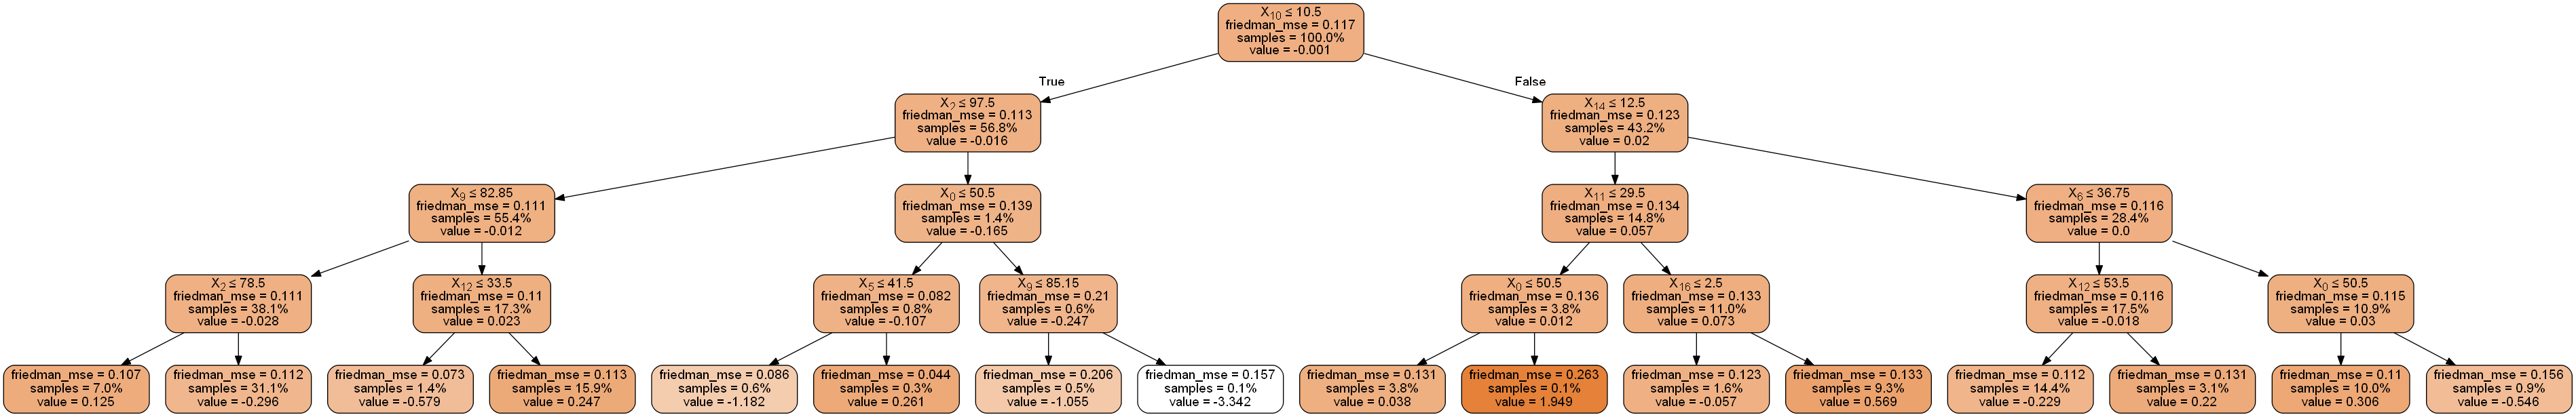

In [86]:
# Graph tree
dot_data = tree.export_graphviz(
    classifier.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())